In [2]:
%load_ext autoreload

%autoreload 2
from src import ODE_euler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1) Dibujar Y_real y Y_aprox

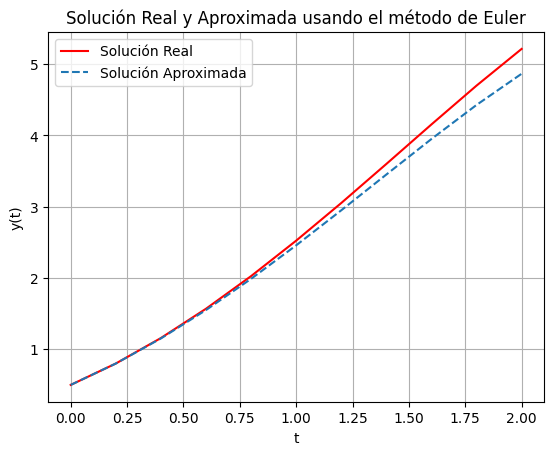

In [36]:
import math
import matplotlib.pyplot as plt

# Funcion Real
def f_real(t: float, y: float) -> float:
    return 2 * (t + 1) - 0.5 * math.exp(t)

# Parámetros del problema
y_t0_real = (0 + 1)**2 - 0.5 * math.exp(0)  


ys_real, ts_real, h_real = ODE_euler(a=0, b=2, f=f_real, y_t0=y_t0_real, N=10)

# Funcion Aproximada
def f_approx(t: float, y: float) -> float:
    return y - (t**2) + 1 
 

ys_aproximado, ts_aproximado, h_aproximado = ODE_euler(a=0, b=2, f=f_approx, y_t0=0.5, N=10)

# Plotting both solutions
plt.plot(ts_real, ys_real, label='Solución Real', color='red')
plt.plot(ts_aproximado, ys_aproximado,linestyle = '--', label='Solución Aproximada')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Solución Real y Aproximada usando el método de Euler')
plt.legend()
plt.grid(True)
plt.show()

### 2) Dibujar en otro grafico valores de N=10,5,20

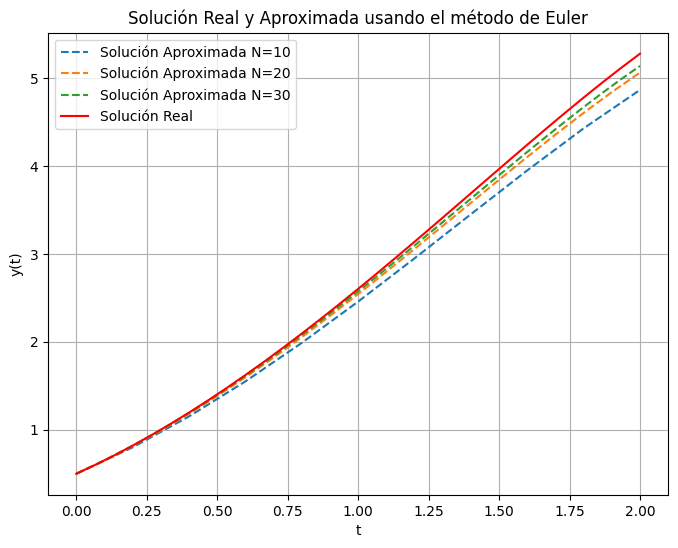

In [37]:
import math
import matplotlib.pyplot as plt

# Método de Euler
def ODE_euler(a, b, f, y_t0, N):
    h = (b - a) / N
    t_values = [a + i * h for i in range(N+1)]
    y_values = [y_t0]
    for i in range(1, N+1):
        y_values.append(y_values[-1] + h * f(t_values[i-1], y_values[-1]))
    return y_values, t_values, h

# Función Real
def f_real(t: float, y: float) -> float:
    return 2 * (t + 1) - 0.5 * math.exp(t)

# Parámetros del problema para la solución real
a = 0
b = 2
y_t0_real = (0 + 1)**2 - 0.5 * math.exp(0)
N_values = [10, 20, 30]  # Diferentes valores de N

# Función Aproximada
def f_approx(t: float, y: float) -> float:
    return y - (t * t) + 1


# Inicialización del gráfico
plt.figure(figsize=(8, 6))

# Graficar para diferentes valores de N
for N in N_values:
    ys_aproximado, ts_aproximado, h_aproximado = ODE_euler(a=a, b=b, f=f_approx, y_t0=0.5, N=N)
    
    # Graficando las soluciones aproximadas
    plt.plot(ts_aproximado, ys_aproximado, linestyle='--', label=f'Solución Aproximada N={N}')

# Graficar la solución real en el gráfico
ys_real, ts_real, h_real = ODE_euler(a=a, b=b, f=f_real, y_t0=y_t0_real, N=30)
plt.plot(ts_real, ys_real, label='Solución Real', color='red')

# Configuración del gráfico
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Solución Real y Aproximada usando el método de Euler')
plt.legend()
plt.grid(True)
plt.show()

### 3) Repetir segundo ejercicio dy/dt = y/t - (y/t)^2

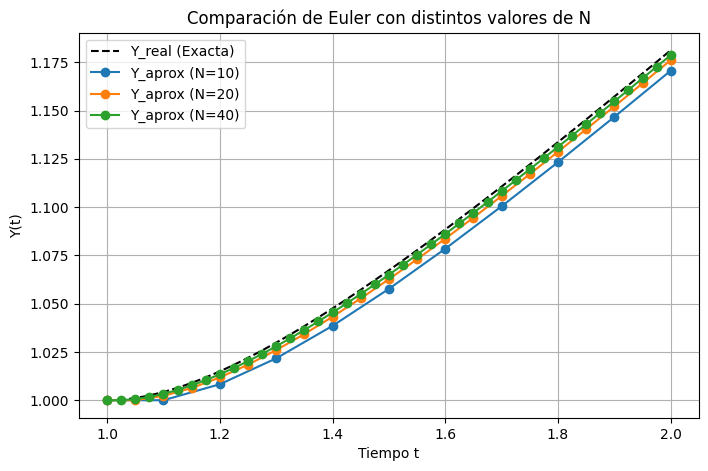

In [50]:

# Método de Euler para resolver ODE
def ODE_euler(a: float, b: float, f, y_t0: float, N: int):
    h = (b - a) / N  # Tamaño del paso
    t_values = [a + i * h for i in range(N+1)]  # Puntos en el tiempo
    y_values = [y_t0]  # Valor inicial de y
    for i in range(N):
        t = t_values[i]
        y = y_values[i]
        y_values.append(y + h * f(t, y))  # Método de Euler
    return y_values, t_values, h

# Función Aproximada
def f(t: float, y: float) -> float:
    return (y / t) - (y / t) ** 2

# Parámetros del problema
a = 1
b = 2
y_t0 = 1

# Valores de N para las distintas simulaciones
N_values = [10, 20, 40]

# Solución exacta para comparación
t_exact = [a + i * (b - a) / 100 for i in range(101)]
y_exact = [ti / (1 + math.log(ti)) for ti in t_exact]

# Graficar la solución exacta
plt.figure(figsize=(8, 5))
plt.plot(t_exact, y_exact, label="Y_real (Exacta)", linestyle="dashed", color="black")

# Graficar las soluciones aproximadas con diferentes valores de N
for N in N_values:
    y_aprox, t, _ = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N)
    plt.plot(t, y_aprox, marker="o", label=f"Y_aprox (N={N})")

# Etiquetas y título
plt.xlabel("Tiempo t")
plt.ylabel("Y(t)")
plt.title("Comparación de Euler con distintos valores de N")
plt.legend()
plt.grid(True)
plt.show()


### 4) ¿Qué sucede al cambiar N?

Cuando aunmeta el valor de N, la solución se aproxima mejor, ya que al reducirse este paso con un mayor N, el error disminuye. Con valores bajos de N, la aproximación se aleja de la solución real, mientras que con valores más altos, los puntos generados se ajustan mejor a la solución exacta.